In [117]:
forcefield_type = 'mbpol'
xml_file = 'mbpol_one.xml'

#xml_file can be left blank

In [118]:
!python test.py $forcefield_type True $xml_file

Traceback (most recent call last):
  File "test.py", line 13, in <module>
    import mbpol
  File "/home/sebastian/anaconda3/lib/python3.4/site-packages/mbpol-1.0-py3.4-linux-x86_64.egg/mbpol.py", line 66
    v = mbpolplugin.vectori()
    ^
IndentationError: expected an indented block


In [119]:
!python test.py $forcefield_type False $xml_file

Traceback (most recent call last):
  File "test.py", line 13, in <module>
    import mbpol
  File "/home/sebastian/anaconda3/lib/python3.4/site-packages/mbpol-1.0-py3.4-linux-x86_64.egg/mbpol.py", line 66
    v = mbpolplugin.vectori()
    ^
IndentationError: expected an indented block


In [120]:
!wc mbpol_trajectory.pdb
!wc flexible_mbpol_trajectory.pdb

  1502  14908 102151 mbpol_trajectory.pdb
  1502  14908 102151 flexible_mbpol_trajectory.pdb


In [121]:
import mdtraj

In [122]:
trajectories = mdtraj.load(forcefield_type + '_trajectory.pdb')
flexible_trajectories = mdtraj.load('flexible_' + forcefield_type +'_trajectory.pdb')
#print (trajectories)

In [123]:
distances = mdtraj.compute_distances(trajectories, [[0,1],[0,2],])
flexible_distaces = mdtraj.compute_distances(flexible_trajectories, [[0,1],[0,2]])
#print (distances)

In [124]:
import matplotlib.pyplot as plt
%matplotlib inline

#type(distances)

In [125]:
import seaborn as sns
sns.set_style('dark')

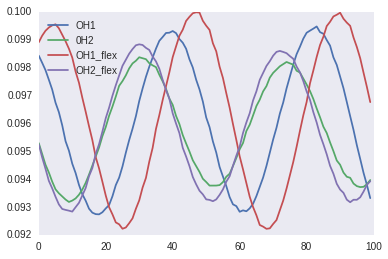

In [126]:
plt.plot(distances[:,0], label='OH1')
plt.plot(distances[:,1], label='0H2')
plt.plot(flexible_distaces[:,0], label='OH1_flex')
plt.plot(flexible_distaces[:,1], label='OH2_flex')
plt.legend(loc='best')
plt.show()

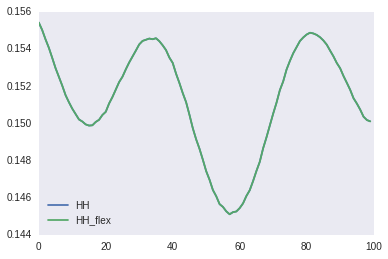

In [127]:
hhdistances = mdtraj.compute_distances(trajectories, [[1,2]])
plt.plot(hhdistances, label='HH')
flexible_hhdistances = mdtraj.compute_distances(flexible_trajectories, [[1,2]])
plt.plot(hhdistances, label='HH_flex')
plt.legend(loc='best')